In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
def extract_time(row):
    date = datetime.datetime.strptime(row.date, '%Y-%m-%dT%H:%M:%S.%fZ').time().replace(second=0, microsecond=0)
    return date

votes = pd.read_csv("all.csv")
votes = votes.set_index('post_id')
votes['time'] = votes.apply(lambda row: extract_time(row), axis=1)
pd.set_option('display.max_colwidth', -1)

In [ ]:
def train_model(votes, from_band, to_band):
    data = votes[(votes.band == from_band)].join(votes[(votes.band == to_band)].score, how='inner', rsuffix='_final')
    train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(train_set.score.values.reshape(-1, 1), train_set.score_final.values.reshape(-1, 1))
    predictions = lin_reg.predict(test_set.score.values.reshape(-1, 1))
    rms = np.sqrt(mean_squared_error(test_set.score_final.values.reshape(-1, 1), predictions))
    print("Prediction rms: ", rms)
    return lin_reg

In [ ]:
model = train_model(votes, 24, 25)

In [ ]:
model.predict(np.array([3026]).reshape(-1, 1))

In [ ]:
votes[(votes.band == 22) & (votes.score > 2000)]

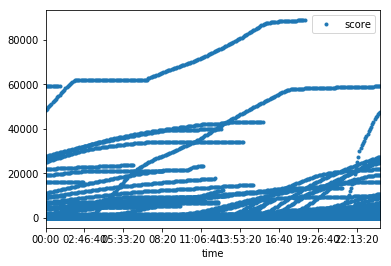

In [306]:
# votes.plot(x="time", y="score", style='.')